<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/K_means__clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **dividing dataset into clusters**

In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: >

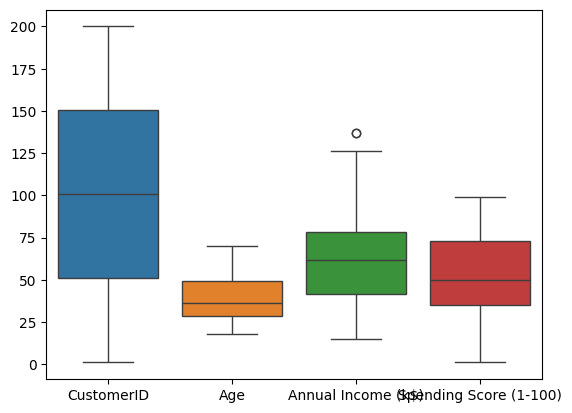

In [10]:
import seaborn as sns
sns.boxplot(df)

In [12]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [13]:
df_numeric_cleaned = df_numeric.copy()

for column in df_numeric.columns:
  Q1 = df_numeric[column].quantile(0.25)
  Q3 = df_numeric[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_numeric_cleaned = df_numeric_cleaned[(df_numeric_cleaned[column] >= lower_bound) & (df_numeric_cleaned[column] <= upper_bound)]

print(f"Original shape: {df_numeric.shape}")
print(f"Cleaned shape: {df_numeric_cleaned.shape}")
print("Outlier removal complete.")

Original shape: (200, 4)
Cleaned shape: (198, 4)
Outlier removal complete.


In [14]:
x = df.iloc[:, 3: ].values

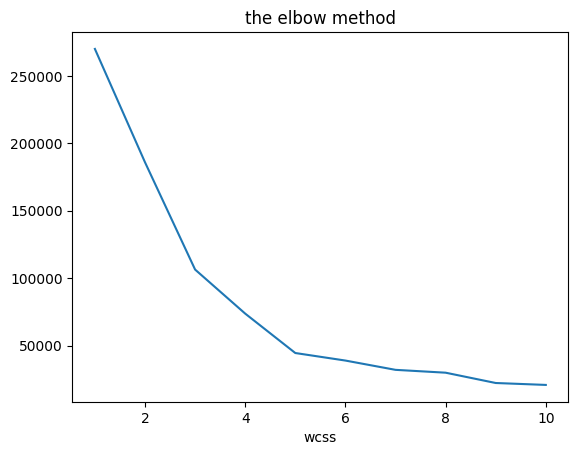

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("the elbow method")
plt.xlabel("no of clusters")
plt.xlabel("wcss")
plt.show()

WCSS stands for Within-Cluster Sum of Squares. In K-Means clustering, it's a measure used to evaluate the compactness of the clusters. It calculates the sum of the squared distances between each point and the centroid of its assigned cluster. A smaller WCSS generally indicates a better clustering, as the points within each cluster are closer to their centroid.

In the Elbow Method plot you just generated, WCSS is plotted against the number of clusters (k). The 'elbow' point in the graph, where the rate of decrease in WCSS significantly slows down, is typically chosen as the optimal number of clusters.

to find the value of k, we use elbow method.In above graph k = 5

In [18]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_means = kmeans.fit_predict(x)

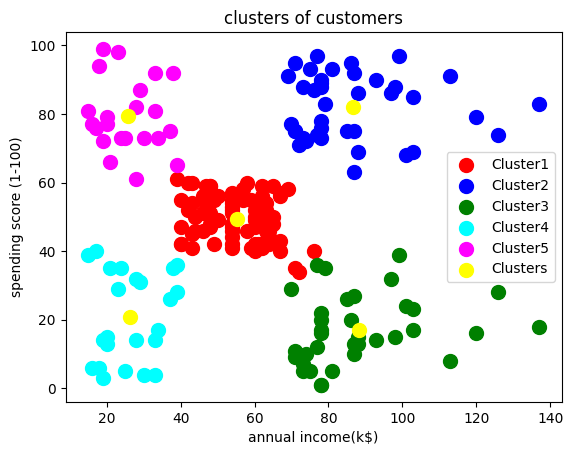

In [19]:
plt.scatter(x[y_means ==0, 0], x[y_means == 0, 1], s = 100, c= 'red', label = 'Cluster1')
plt.scatter(x[y_means ==1, 0], x[y_means == 1, 1], s = 100, c= 'blue', label = 'Cluster2')
plt.scatter(x[y_means ==2, 0], x[y_means == 2, 1], s = 100, c= 'green', label = 'Cluster3')
plt.scatter(x[y_means ==3, 0], x[y_means == 3, 1], s = 100, c= 'cyan', label = 'Cluster4')
plt.scatter(x[y_means ==4, 0], x[y_means == 4, 1], s = 100, c= 'magenta', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c= 'yellow', label = 'Clusters')
plt.title("clusters of customers")
plt.xlabel("annual income(k$)")
plt.ylabel("spending score (1-100)")
plt.legend()
plt.show()